# Prediction des prix des logements aux USA 

Ce concours nous met au défi de prédire le prix final de chaque maison.

Importation des données et des libraries 

In [1]:
#importation des libraries
import pandas as pd 
import numpy as np
pd.options.display.max_rows=1000 # pour pouvoir afficher toutes les lignes 
# libraries pour la visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt
#librairie pour la matrice de corrélation
import seaborn as sb
#Librairie pour le test de chi2
from scipy.stats import chi2_contingency
#librairie pour partitionner les données 
from sklearn.model_selection import train_test_split
# Importation de librairie pour le modèle de regression lineaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Import Support Vector Machine
from sklearn.svm import SVR
#importation des libraries permettant d'évaluer les modèles
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score


In [2]:
#importation des données 
test_df = pd.read_csv('C:/Users/imahamad/OneDrive - ONI/Bureau/BigDATA/test.csv', sep=",")
train_df = pd.read_csv('C:/Users/imahamad/OneDrive - ONI/Bureau/BigDATA/train.csv', sep=",")

# I - Analyse exploratoire des données 

# a) Présentation des données et des variables

In [3]:
#Aperçu sur notre les données de train
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Notre base de données est constituée de 1459 lignes et 79 variables explicatives décrivant (presque) tous les aspects des maisons résidentielles à Ames, Iowa. 
Les variables exlicatives se presentent comme suit : 
- 36 variables numériques
- 43 variables catégorielles 


In [4]:
# vérifier s'il ya de lignes qui sont dupliquées 
train_df.duplicated().sum()
test_df.duplicated().sum()

0

Nous n'avons aucune ligne dupliquée

# b) Traitement des valeurs manquantes

In [5]:
#valeurs manquantes dans df-train
percent_missing_train = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df_train = pd.DataFrame({'Colonne': train_df.columns,
                                 'Pourcentage': percent_missing_train})


missing_value_df_train.sort_values('Pourcentage', inplace=True)
missing_value_df_train

,Colonne,Pourcentage
Id,Id,0.000000
TotalBsmtSF,TotalBsmtSF,0.000000
Heating,Heating,0.000000
SaleCondition,SaleCondition,0.000000
CentralAir,CentralAir,0.000000
1stFlrSF,1stFlrSF,0.000000
2ndFlrSF,2ndFlrSF,0.000000
LowQualFinSF,LowQualFinSF,0.000000
GrLivArea,GrLivArea,0.000000
BsmtFullBath,BsmtFullBath,0.000000


Comme nous pouvons le constater, les variables Alley, FireplaceQu, PoolQC, Fence, MiscFeature  ne contiennent pas assez de modalités. En effet, ces variables ont plus de 50% de données manquantes. 
Nous avons donc decidé de les supprimé.

In [6]:
#supression des variables n'ayant pas assez de lignes 
train_df = train_df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis ='columns')
test_df = test_df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis ='columns')

Pour les données manquantes, nous appliquons les transformations en fonction des fréquences d'apparition de ces données manquantes : 
- si le seuil est inférieurs ou égal à 2%,  nous supprimons les observations
- si le seuil est compris entre 2% et 15%, nous imputons aux données manquantes la modalité la plus fréquente. Et, pour les données numériques la moyenne des observations.    

Nous ferons donc ces transformations dans les lignes qui suivent: 


In [7]:
# suppression des lignes avec des données manquantes dans le train
train_df=train_df.dropna(subset=['GarageCars', 'GarageArea','KitchenQual','Exterior1st','SaleType','TotalBsmtSF','BsmtUnfSF','Exterior2nd',
                       'BsmtFinSF1','BsmtFinSF2','BsmtFullBath','Functional',
                       'Utilities','BsmtHalfBath','Electrical','MasVnrType', 'Electrical','MasVnrArea','MSZoning'])

In [8]:
# on remplace les données manquantes des variables numériques par la moyenne

train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean(),inplace = True)
train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(),inplace = True)
train_df['GarageArea'].fillna(train_df['GarageArea'].mean(),inplace = True)
train_df['TotalBsmtSF'].fillna(train_df['TotalBsmtSF'].mean(),inplace = True)
train_df['BsmtUnfSF'].fillna(train_df['BsmtUnfSF'].mean(),inplace = True)
train_df['BsmtFinSF1'].fillna(train_df['BsmtFinSF1'].mean(),inplace = True)
train_df['BsmtFinSF2'].fillna(train_df['BsmtFinSF2'].mean(),inplace = True)

In [9]:
# remplace les données manquantes par la modalité la plus fréquente

train_df['BsmtQual'].value_counts()
train_df['BsmtQual'].fillna('TA',inplace = True)

train_df['BsmtCond'].value_counts()
train_df['BsmtCond'].fillna('TA',inplace = True)

train_df['BsmtFinType1'].value_counts()
train_df['BsmtFinType1'].fillna('Unf',inplace = True)

train_df['BsmtFinType2'].value_counts()
train_df['BsmtFinType2'].fillna('Unf',inplace = True)

train_df['BsmtExposure'].value_counts()
train_df['BsmtExposure'].fillna('No',inplace = True)

train_df['GarageQual'].value_counts()
train_df['GarageQual'].fillna('TA',inplace = True)


train_df['GarageCond'].value_counts()
train_df['GarageCond'].fillna('TA',inplace = True)


train_df['GarageType'].value_counts()
train_df['GarageType'].fillna('Attchd',inplace = True)


train_df['GarageFinish'].value_counts()
train_df['GarageFinish'].fillna('Unf',inplace = True)

train_df['KitchenQual'].value_counts()
train_df['KitchenQual'].fillna('TA',inplace = True)

train_df['Exterior1st'].value_counts()
train_df['Exterior1st'].fillna('VinylSd',inplace = True)

train_df['SaleType'].value_counts()
train_df['SaleType'].fillna('WD',inplace = True)

train_df['SaleType'].value_counts()
train_df['SaleType'].fillna('WD',inplace = True)

train_df['Exterior2nd'].value_counts()
train_df['Exterior2nd'].fillna('VinylSd',inplace = True)

In [10]:
#Verification si les valeurs manquantes sont traitées
#valeurs manquantes dans df-train
percent_missing_train2 = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df_train2 = pd.DataFrame({'Colonne': train_df.columns,
                                 'Pourcentage': percent_missing_train2})


missing_value_df_train2.sort_values('Pourcentage', inplace=True)
missing_value_df_train2

,Colonne,Pourcentage
Id,Id,0.0
Functional,Functional,0.0
TotRmsAbvGrd,TotRmsAbvGrd,0.0
KitchenQual,KitchenQual,0.0
KitchenAbvGr,KitchenAbvGr,0.0
BedroomAbvGr,BedroomAbvGr,0.0
HalfBath,HalfBath,0.0
FullBath,FullBath,0.0
BsmtHalfBath,BsmtHalfBath,0.0
BsmtFullBath,BsmtFullBath,0.0


Comme on peut le voir notre base de données ne contient aucune données manquantes. 
Nous pouvons maintenant passer à l'exploration analytique de notre dataset.

# II - Statistiques descriptives 

In [11]:
print("structure de la base d'apprentissage : ",train_df.shape)

structure de la base d'apprentissage :  (1451, 76)


Notre base d'apprentissage est constituée de 1451 lignes pour 76 variables. 

Regardons de plus près les propriétés statistiques de notre base de données.

# a) Variables numériques 

Tout d'abord, nous nous intéresserons à la distribution statistique de nos données numériques.  

In [12]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,70.027638,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,...,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,22.040935,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,...,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,70.027638,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Ici, nous nous intéresserons à la distribution statistique de notre variable cible qui est le prix du vente des maisons.  Voyons comment cette variable est repartie.

In [13]:
#descriptive statistics summary
train_df['SalePrice'].describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


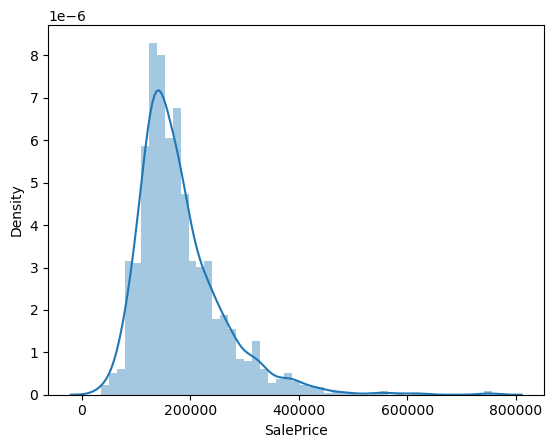

In [14]:
#histogram

sns.distplot(train_df['SalePrice']);

Nous pouvons remarquer que la distribution du prix s'écarte de la distribution normale.
Les prix sont plutôt étalés vers la droite et certaines valeurs extrêmes sont supérieures à 500 000. 

Ainsi, nous essayerons de s'en débarrasser pour obtenir la distribution normale de l'argument ("SalePrice") pour l'apprentissage automatique.

# b) Variables catégorielles 

Nous allons regarder la fréquence de nos variables catégorielles afin de faire un premier tri sur nos variables.

Les variables ci-dessous ont des modalités avec de fréquences très hétérogènes. En effet, plus de 90% des données sont concentrées
dans une seule modalité. Cela fournit donc très peu d'informations dans l'ensemble de données. 
Ce sont : 

- La variable "Street", le type d'accès routier 
- "utilities", type d'utilitaires disponibles
- "condition 2"
- RoofMatl Matériau de toiture
- heating

In [15]:
#suppression des variables
train_df = train_df.drop(['Street','Utilities','Condition2','RoofMatl','Heating'], axis ='columns')
test_df = test_df.drop(['Street','Utilities','Condition2','RoofMatl','Heating'], axis ='columns')

# III) Etude de la liaison entre les variables 

Dans cette partie, nous allons vérifier la corrélation de nos variables. 
Tout d'abord, nous vérifierons que nos variables explicatives sont bien corrélées à la variable expliquée.
Ensuite, nous nous assurerons que les variables X qualitatives ne sont pas corrélées entre elles, et les variables numériques n'ont plus. Et, enfin nous transformerons les variables numériques en qualitatives avant de vérifier la corrélation entre toutes les variables x.  

# a) Etude de la liaison entre la variable cible et les x variables catégorielles.

Pour le lien entre deux variables qualitatives, nous allons transformer la variable prix de logement en classe. Ensuite, faire le test de khi-Deux pour l'indépendance entre les variables. Et enfin, mesurer cette intensité à partir de V-Cramer. 

In [16]:
# Liste des variables catégorielles
cat_vars = ['MSZoning', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

#Regroupement de la variable Y en classe avant de faire le test de Khi-Deux  et le v de Cramer 

train_df.loc[train_df['SalePrice'].between(0, 100000, 'both'), 'prix_interval'] = 'inf_100k' 
train_df.loc[train_df['SalePrice'].between(100000, 150000, 'right' ), 'prix_interval'] = '100k_150k' 
train_df.loc[train_df['SalePrice'].between(150000, 200000, 'right' ), 'prix_interval'] = '150k_200k' 
train_df.loc[train_df['SalePrice'].between(200000, 250000, 'right' ), 'prix_interval'] = '200k_250k' 
train_df.loc[train_df['SalePrice'].between(250000, 300000, 'right' ), 'prix_interval'] = '250k_300k' 
train_df.loc[train_df['SalePrice'].between(300000, 800000, 'right' ), 'prix_interval'] = '300k_800k' 


In [17]:

#1er test de khi 2

alpha = 0.05 # seuil

# le test de khi-2 entre la variable cible et les variables catégorielles
for col in cat_vars:
    print("La variable explicative:", col)
    contingency_table = pd.crosstab(train_df[col], train_df["prix_interval"])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    if p <= alpha:
        print("les deux variables sont corrélées  (p = {:.3f})".format(p))
    else:
        print("les deux variables sont independantes (p = {:.3f})".format(p))


La variable explicative: MSZoning
les deux variables sont corrélées  (p = 0.000)
La variable explicative: LotShape
les deux variables sont corrélées  (p = 0.000)
La variable explicative: LandContour
les deux variables sont corrélées  (p = 0.000)
La variable explicative: LotConfig
les deux variables sont corrélées  (p = 0.001)
La variable explicative: LandSlope
les deux variables sont independantes (p = 0.152)
La variable explicative: Neighborhood
les deux variables sont corrélées  (p = 0.000)
La variable explicative: Condition1
les deux variables sont corrélées  (p = 0.000)
La variable explicative: BldgType
les deux variables sont corrélées  (p = 0.000)
La variable explicative: HouseStyle
les deux variables sont corrélées  (p = 0.000)
La variable explicative: RoofStyle
les deux variables sont corrélées  (p = 0.000)
La variable explicative: Exterior1st
les deux variables sont corrélées  (p = 0.000)
La variable explicative: Exterior2nd
les deux variables sont corrélées  (p = 0.000)
La va

Les variables qui ne sont pas corrélées avec la variable cible sont : LandSlope (pente de la propriété) et BsmtFinType2 (Classement de la surface finie du sous-sol). 


- Pour les varibles corrélées, nous allons mesurer l'intensité de cettte liaison à partir de V-Cramer.

In [18]:

# Liste des variables catégorielles
cat_vars2 = ['MSZoning', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

#CALCUL DU V DE CRAMER SUR LES VARIABLES CATEGORIELLES

# Boucle pour calculer la statistique de Cramer V pour chaque variable catégorielle
for var in cat_vars2:
    crosstab = pd.crosstab(train_df['prix_interval'], train_df[var])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    V = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
    print(f"La statistique de Cramer V entre la variable cible et {var} est {V:.4f}")

#seuil 0,15 entre X et Y 


La statistique de Cramer V entre la variable cible et MSZoning est 0.2285
La statistique de Cramer V entre la variable cible et LotShape est 0.1862
La statistique de Cramer V entre la variable cible et LandContour est 0.1158
La statistique de Cramer V entre la variable cible et LotConfig est 0.0889
La statistique de Cramer V entre la variable cible et Neighborhood est 0.4498
La statistique de Cramer V entre la variable cible et Condition1 est 0.1204
La statistique de Cramer V entre la variable cible et BldgType est 0.1306
La statistique de Cramer V entre la variable cible et HouseStyle est 0.1825
La statistique de Cramer V entre la variable cible et RoofStyle est 0.1358
La statistique de Cramer V entre la variable cible et Exterior1st est 0.2505
La statistique de Cramer V entre la variable cible et Exterior2nd est 0.2455
La statistique de Cramer V entre la variable cible et MasVnrType est 0.2644
La statistique de Cramer V entre la variable cible et ExterQual est 0.4736
La statistique d

Nous avons fixé un seuil égal à 0,15.  
Le V de Cramer nous permet de mesurer l'intensité entre notre variable cible et les variables catégorielles corrélées.
Nous notons que les variables dont les intensités sont les plus fortes (>0,15) sont :

'MSZoning', 'LotShape','Neighborhood','HouseStyle','Exterior1st','Exterior2nd','MasVnrType', 'ExterQual', 'Foundation',
'BsmtQual','BsmtFinType1','HeatingQC','CentralAir', 'Electrical', 'KitchenQual', 'GarageFinish',
'PavedDrive'

# b) Liaison entre les X qualitatives

Dans cette partie, nous vérifions l'indépendance entre nos variables explicatives. 
En effet, cette étape est importante car elle permet d'éviter de prendre la même information plusieurs fois. Deux ou plusieurs 
variables corrélées peuvent biaiser le modèle. Nous allons donc veiller à ne garder que l'une des variables qui expliquent le plus le prix des logements.

Ainsi, nous appliquons le v-cramer entre les variables explicatives : 


In [19]:
cat_vars3 = ['MSZoning', 'LotShape','Neighborhood','HouseStyle','Exterior1st','Exterior2nd','MasVnrType', 'ExterQual', 'Foundation',
'BsmtQual','BsmtFinType1','HeatingQC','CentralAir', 'Electrical', 'KitchenQual', 'GarageFinish',
'PavedDrive']


# Boucle pour calculer la statistique de Cramer V pour chaque variable catégorielle
for var in cat_vars3:
    crosstab = pd.crosstab(train_df['PavedDrive'], train_df[var])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    V = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
    #print(f"La statistique de Cramer V entre la variable cible et {var} est {V:.4f}")

 Nous obtenons une corrélation forte entre : 
- la variable MSzoning et Neighborhood (0.6509). Les deux variables donnent des informations sur l'emplacement de la maison.  
- la variable Exterior1st et Exterior2nd (0.7635). N'est-il pas judicieux de regrouper ces deux variables? 

Conclusion : On retient la variable MSZoning (classification générale du zonage). 

In [20]:
cat_vars_final = ['MSZoning', 'LotShape','HouseStyle','Exterior1st','MasVnrType', 'ExterQual', 'Foundation',
'BsmtQual','BsmtFinType1','HeatingQC','CentralAir', 'Electrical', 'KitchenQual', 'GarageFinish',
'PavedDrive']

# c) Etude de liaison entre la variable cible et les variable explicatives numériques 

La matrice de corrélation nous permet de mesurer la liaison entre les variables numériques. Dans un 1er temps, nous fixons un seuil supérieur ou égal à 0,4. 

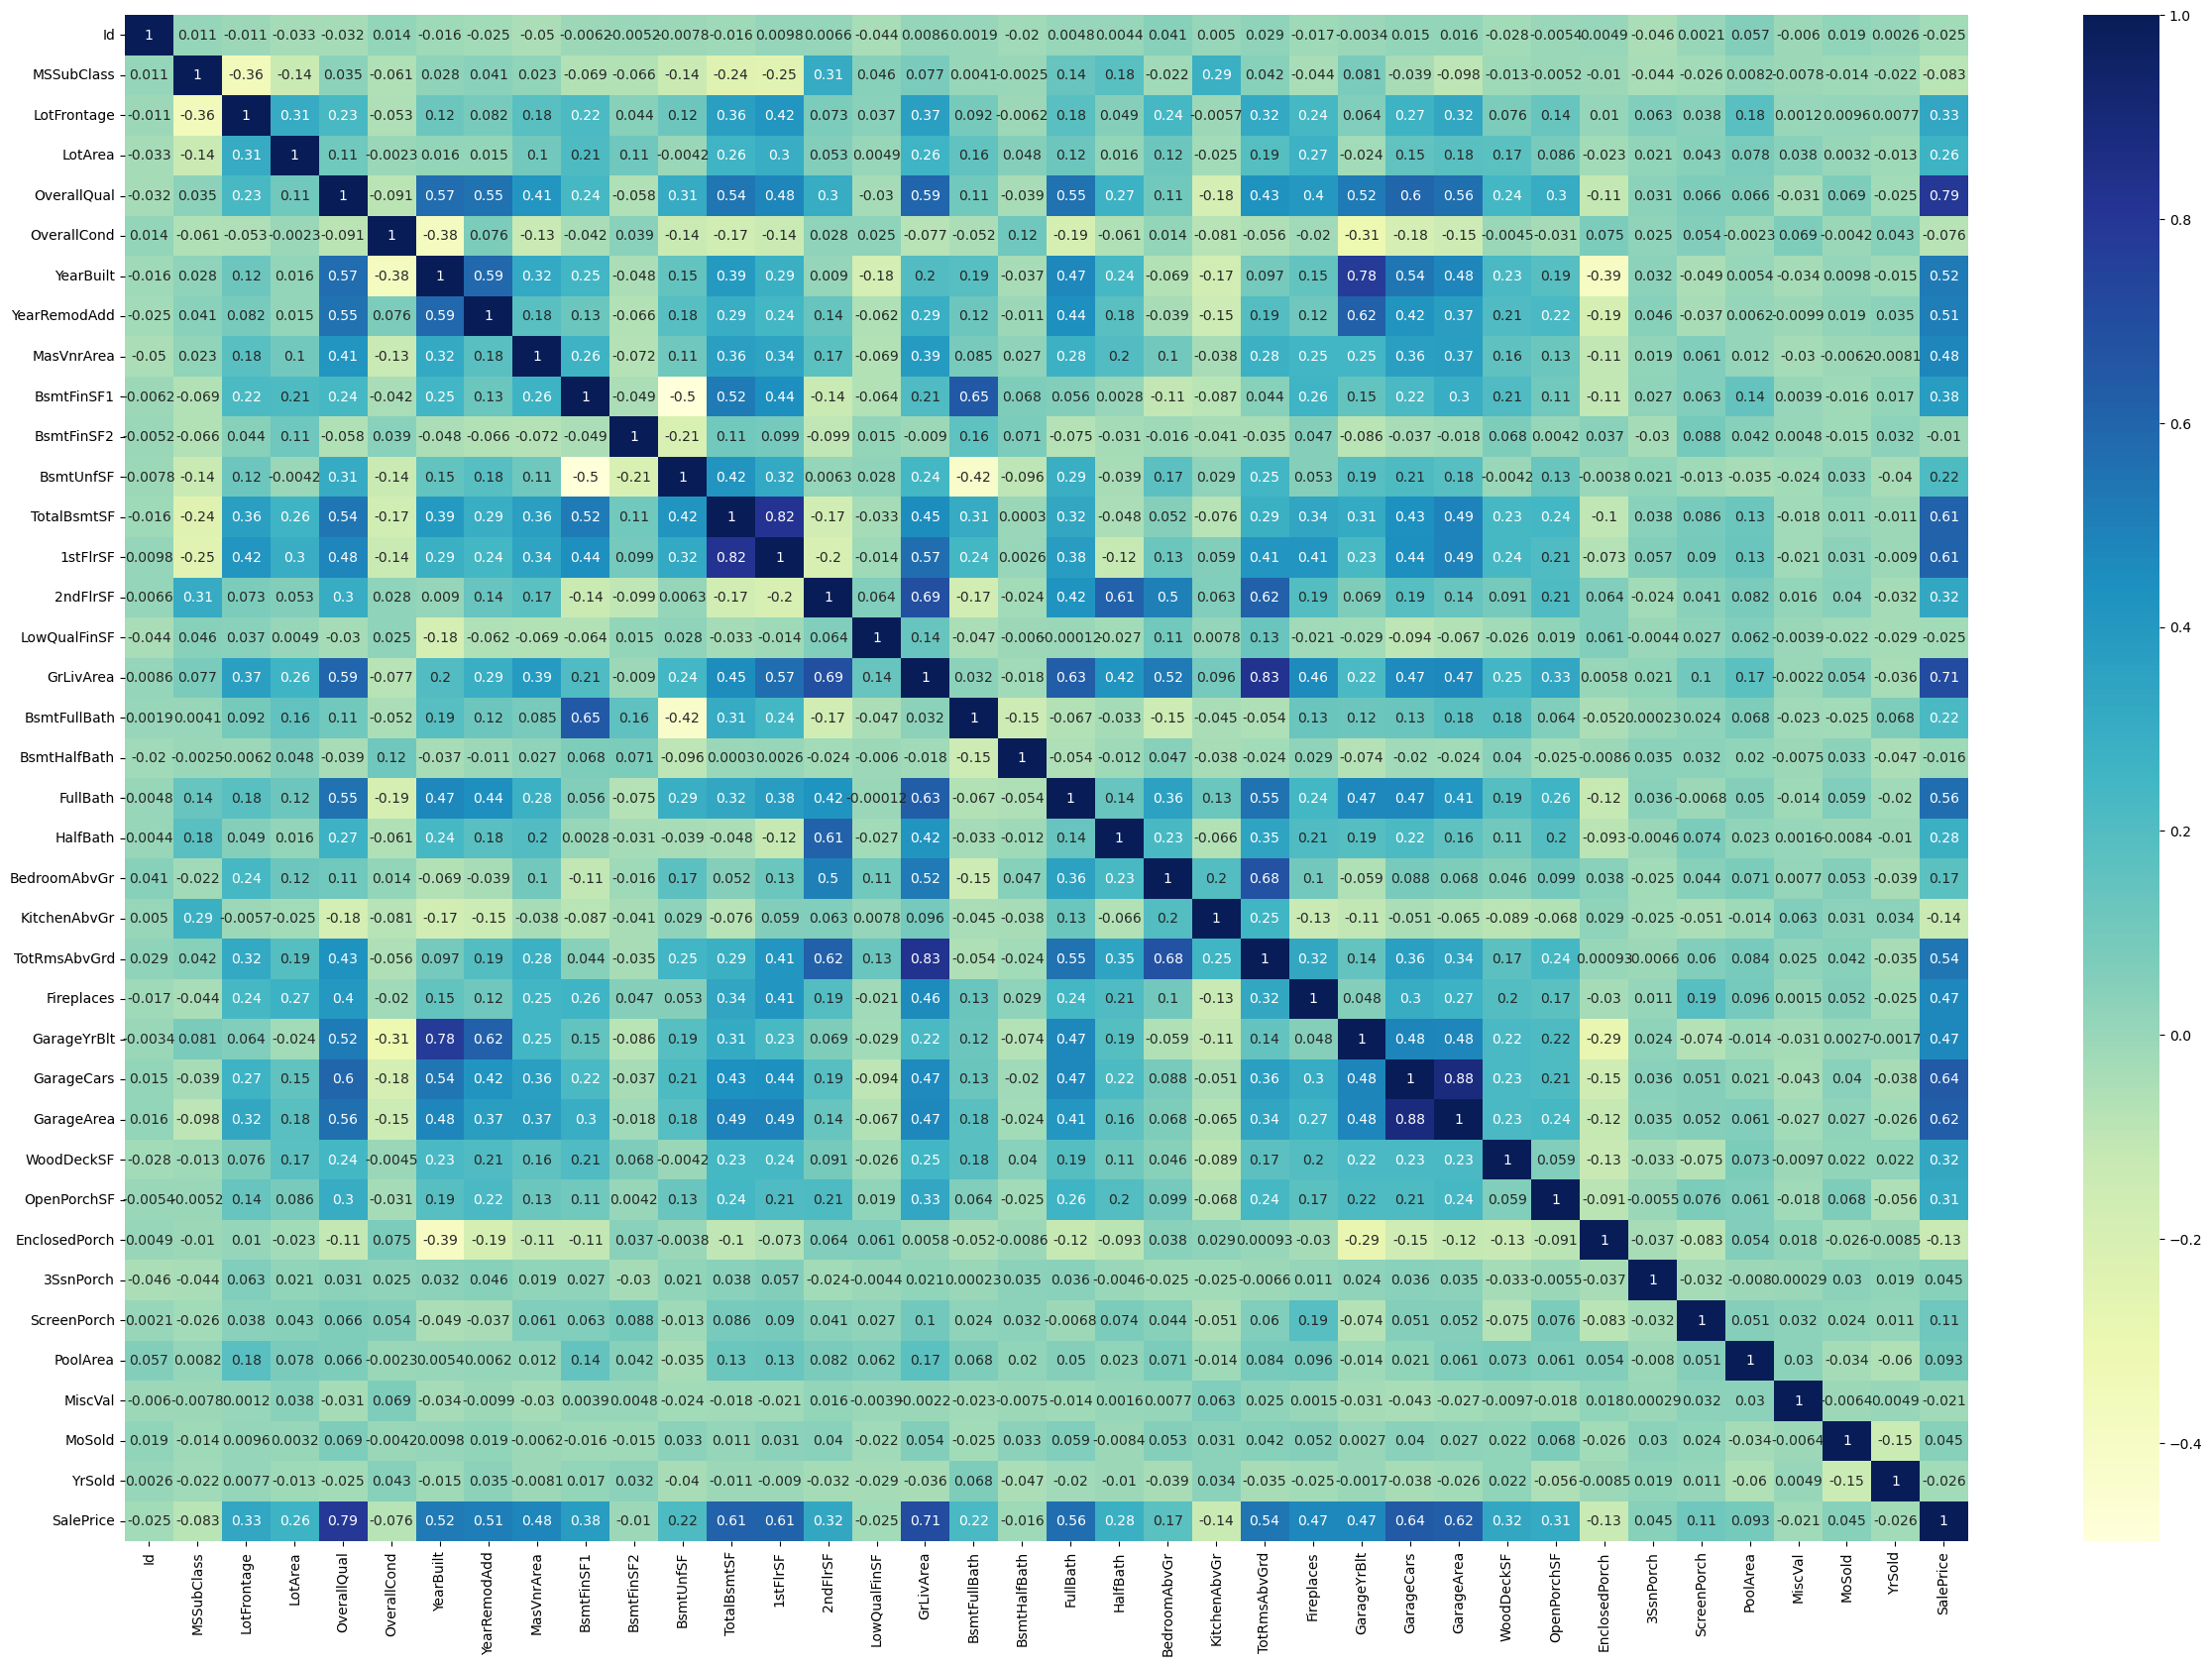

In [21]:
# matrice de correlation
plt.figure(figsize=(30, 20))
dataplot = sb.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)



Les variables numériques qui sont le plus corrélées (supérieur à 0,4) aves le prix du logement sont : 
- OverallQual      0.790085   (note évaluant le matériau global et la finition de la maison)   
- YearBuilt        0.523274   (Année de construction)     
- YearRemodAdd     0.507488   (Année de rénovation)    
- MasVnrArea       0.477486   (Surface du placage de maçonnerie en pieds carrés)     
- TotalBsmtSF      0.613299   (surface du sous-sol en mètres carrés)    
- 1stFlrSF         0.606969   (surface du 1er étage en mètres carrés)    
- GrLivArea        0.710073   (mètre carrés de surface habitable au-dessus du niveau du sol (au sol)) 
- FullBath         0,56       (Nombre de Salles de bain )     
- TotRmsAbvGrd     0.536366   (Nombre total de chambres au-dessus du sol)    
- Fireplaces       0.468973   (Nombre de cheminées)     
- GarageYrBlt      0.470410   (Année de construction du garage)   
- GarageCars       0.639749   (nombre de voitures supportés par le garage)    
- GarageArea       0.622484   (surface du garage)   

# d) Liaison entre les variables explicatives numériques 

Les variables concernant la salle de bain : BsmtFullBath, BsmtHalfBath et HalfBath ne sont pas corrélées au prix. Mais, en regroupant ces variables en une seule, nous allons vérifier si elle ne serait pas corrélée à la variable expliquée. Ainsi, ceci nous évitera de perdre des informations.

Nous allons crée une nouvelle variables "allbath" qui regroupent tous les salles de bain d'un logement. Cette variable sera crée en sommant le nombre des salles de bain et demi salles de bain

In [22]:
#Création de nouvelle variables : 
# allbath
train_df['allbath'] = train_df['BsmtFullBath'] + (train_df['BsmtHalfBath']/2) + train_df['FullBath'] + (train_df['HalfBath']/2)

# difference en année entre l'année de vente et l'année de rénovation
train_df['age'] = train_df['YrSold'] - train_df['YearRemodAdd']

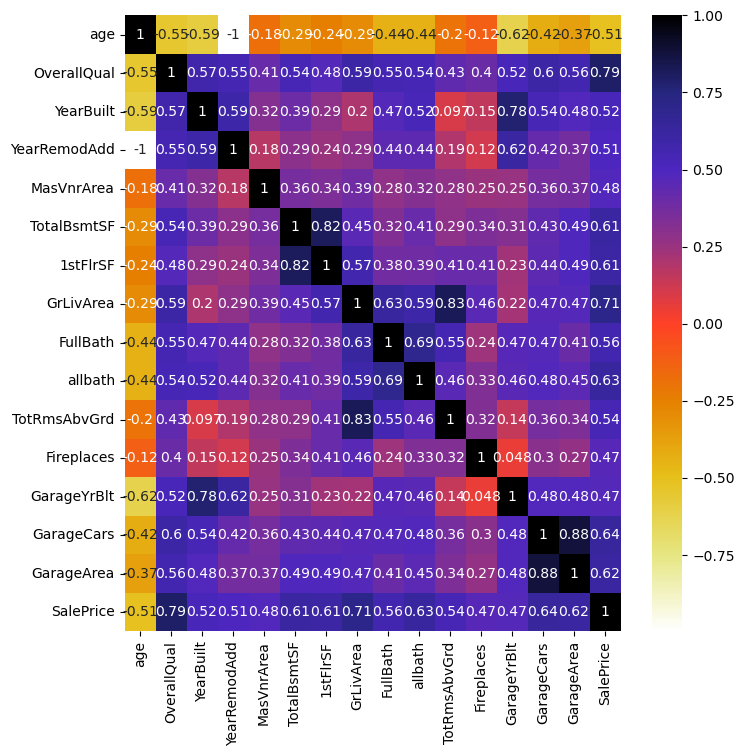

In [23]:
#Matrice de corrélation restreinte

df_num = ['age','OverallQual' , 'YearBuilt' , 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
    'FullBath','allbath', 'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','SalePrice']

df_num2=train_df[df_num]

plt.figure(figsize=(8,8))
cor=df_num2.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show() 


On remarque également des corrélations entre certaines variables :

- Concernant la dimension "surface de logement", on note une corrélation entre la surface totale du sous-sol(totalBsmtSF), la surface habitable au dessus du sous-sol (GrLivArea) et la surface du 1er étage (1stFlrSF). Ceci est plutôt logique car la surface habitable au dessus du sol n'est rien d'autre que la somme de la surface au 1er et 2e étage. Et, en général, la surface du sous-sol n'est pas comprise dans la surface habitable lors des ventes de maisons aux États-Unis. La surface habitable se réfère généralement à l'espace de vie fini et climatisé, qui est au niveau principal et supérieur de la maison. Cependant, la surface du sous-sol peut être mentionnée dans les descriptions de propriété et prise en compte dans l'évaluation de la valeur de la maison, surtout si le sous-sol est fini et utilisable comme espace de vie supplémentaire.Mais, etant donné qu'on n'a pas d'informations sur la finition du sous sol, nous allons garder la "surface habitable", c'est-à-dire la surface totale au dessus du sol. 

-La variable "année de construction du garage" (garageyrblt) sera également supprimée car elle est très corrélée à la date de construction de la maison (yearbuilt) qu'on trouve plus pertinente à garder. 

-Nous supprimerons également la variable garageArea à la place de garageCars car on note que cette dernière influence plus sur le prix du logement (0,62 et 0,64).


-Nous décidons de conserver la date de rénovation (YearRemodAdd) qui est égale à la date de construction (yearbuilt) s'il n'y a pas de rénovation. 

- La surface habitable est aussi corrélée au nombre total de chambre au dessus du sol. Nous décidons de garder la surface car celle-çi est beaucoup plus pertinente. 

- La surface de placage de maçonnerie en pieds carrés (MasVnrArea) et la qualité globale des matériaux et des finitions sont corrélées (OverallQual). Après une exploitation de chacunes des modalités, nous décidons de garder la qualité globale des matériaux qui expliquent beaucoup mieux le prix des logements.


In [24]:
#Les variables numériques finalement retenues : 
# df_num3 = ['OverallQual' , 'age' , 'GrLivArea','allbath','GarageCars','SalePrice']
# Fireplaces : le nombre de chéminées 

In [25]:
#cat_vars_final = ['MSZoning', 'LotShape','HouseStyle','Exterior1st','MasVnrType', 'ExterQual', 'Foundation',
#'BsmtQual','BsmtFinType1','HeatingQC','CentralAir', 'Electrical', 'KitchenQual', 'GarageFinish',
#'PavedDrive']

# III) Suite des traitements des valeurs 

# a) données aberrantes 

Les valeurs aberrantes sont également un sujet dont nous devrions être conscients. Pourquoi ? Parce que les valeurs aberrantes peuvent avoir une incidence marquée sur nos modèles.

Tout d'abord, nous allons examiner la distribution des variables en fonction du prix des logements. 

C:\Users\imahamad\AppData\Local\Temp\ipykernel_18732\2111037465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_var_quant['SurfaceHabitable'] = df_num_var_quant['GrLivArea']/(10.764)


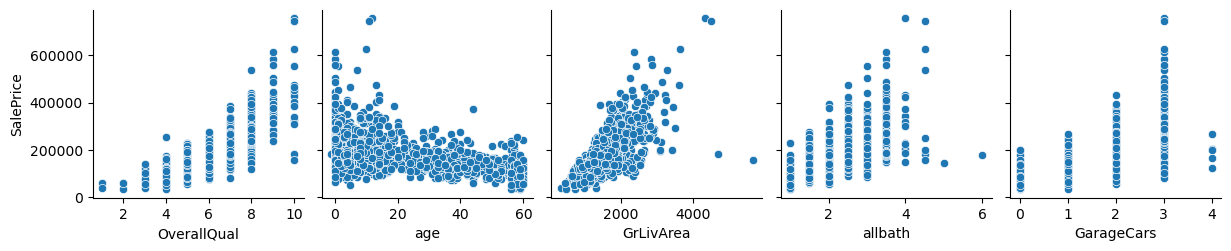

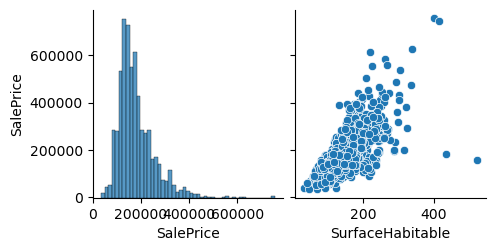

In [26]:
#Distribution des données numériques retenues en fonction du prix du logement


var_quant = ['OverallQual' , 'age' , 'GrLivArea','allbath','GarageCars','SalePrice']

df_num_var_quant = train_df[var_quant]
# creation de l'age de renovation
df_num_var_quant['SurfaceHabitable'] = df_num_var_quant['GrLivArea']/(10.764)

for i in range(0, len(df_num_var_quant.columns), 5):
    sns.pairplot(data=df_num_var_quant,
                x_vars=df_num_var_quant.columns[i:i+5],
                y_vars=['SalePrice'])

Les deux valeurs ayant une plus grande 'GrLivArea' semblent étranges et ne suivent pas la foule. Nous avons aussi deux valeurs qui sont éloignée de la foule mais suivent quand même la tendance. 
Nous pouvons les considérer comme des valeurs aberrantes. On va donc leur imputer la valeur "3500".  

In [27]:
# traitement des valeurs aberrantes 

train_df.loc[train_df["GrLivArea"]>3500,'GrLivArea'] = 3500

train_df.loc[train_df["GarageCars"]>3,'GarageCars'] = 3

# df_num2.loc[df_num2["Fireplaces"]>2,'Fireplaces'] = 2

train_df.loc[train_df["allbath"]>4,'allbath'] = 4

train_df.loc[train_df["SalePrice"]>500000,'SalePrice'] = 500000


C:\Users\imahamad\AppData\Local\Temp\ipykernel_18732\2111037465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_var_quant['SurfaceHabitable'] = df_num_var_quant['GrLivArea']/(10.764)


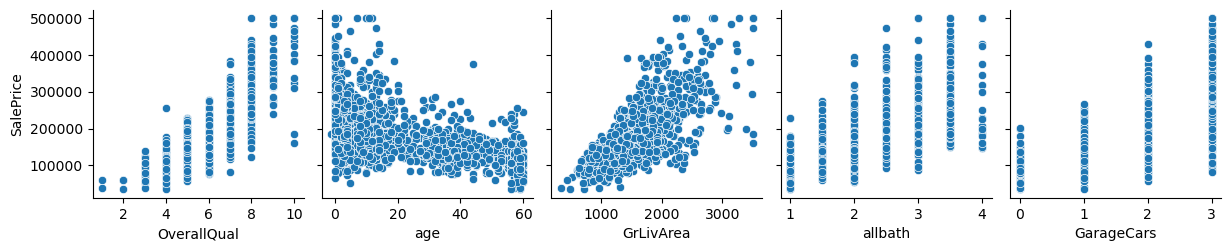

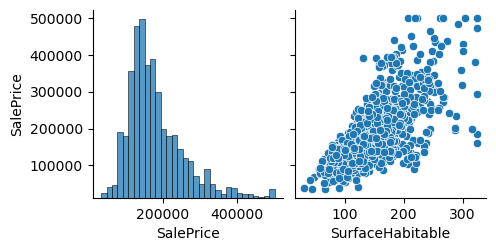

In [28]:
#Distribution des données numériques retenues en fonction du prix du logement


var_quant = ['OverallQual' , 'age' , 'GrLivArea','allbath','GarageCars','SalePrice']

df_num_var_quant = train_df[var_quant]
# creation de l'age de renovation
df_num_var_quant['SurfaceHabitable'] = df_num_var_quant['GrLivArea']/(10.764)

for i in range(0, len(df_num_var_quant.columns), 5):
    sns.pairplot(data=df_num_var_quant,
                x_vars=df_num_var_quant.columns[i:i+5],
                y_vars=['SalePrice'])

# b) Regroupement des modalités 

Cette répartition nous donne une première vue sur les variables, on constate que certaines modalités ne comportent pas ou très peu d'élements. Il conviendrait donc par la suite de procéder à des regroupement de certaines modalités afin que les répartition soit mieux représenter. 

Nous allons donc regrouper ces valeurs et ensuite nous allons les transformer en variables catégorielles.

In [29]:
# Regroupement des modalités dans le train
pd.options.mode.chained_assignment = None  # pour ne pas afficher les avertissements

train_df.loc[train_df['allbath'].between(0, 2, 'both'), 'allbath2'] = '(0_2)bath' 
train_df.loc[train_df['allbath'].between(2, 3, 'right' ), 'allbath2'] = '(2-3)bath' 
train_df.loc[train_df['allbath'].between(3, 6, 'right' ), 'allbath2'] = '(3_6)bath' 


train_df.loc[train_df['OverallQual'].between(0, 4, 'both'), 'OverallQual2'] = '(0_4)note' 
train_df.loc[train_df['OverallQual'] ==  5, 'OverallQual2'] = '(moyenne_5)note' 
train_df.loc[train_df['OverallQual'].between(5, 7, 'right' ), 'OverallQual2'] = '(6-8)note' 
train_df.loc[train_df['OverallQual'].between(7, 10, 'right' ), 'OverallQual2'] = '(8-10)note' 

train_df.loc[train_df['age'].between(0,10, 'both'), 'age2'] = '(0_10)age' 
train_df.loc[train_df['age'].between(10,20, 'right'), 'age2'] = '(10_20)age' 
train_df.loc[train_df['age'].between(20,40, 'right' ), 'age2'] = '(20-40)age' 
train_df.loc[train_df['age'].between(40,60, 'right' ), 'age2'] = '(40-60)age'
train_df.loc[train_df['age'].between(60,80, 'right' ), 'age2'] = '(60-80)age'

train_df['SurfaceHabitable'] = train_df['GrLivArea']/(10.764)
train_df.loc[train_df['SurfaceHabitable'].between(0,100, 'both'), 'SurfaceHabitable2'] = '(0_100)m²' 
train_df.loc[train_df['SurfaceHabitable'].between(100,150, 'right' ), 'SurfaceHabitable2'] = '(100-150)m²' 
train_df.loc[train_df['SurfaceHabitable'].between(150,200, 'right' ), 'SurfaceHabitable2'] = '(150-200)m²'
train_df.loc[train_df['SurfaceHabitable'].between(200,350, 'right' ), 'SurfaceHabitable2'] = '(200-350)m²'

train_df.loc[train_df['GarageCars']==0, 'GarageCars2'] = 'GarageCars0' 
train_df.loc[train_df['GarageCars']==1, 'GarageCars2'] = 'GarageCars1' 
train_df.loc[train_df['GarageCars']==2, 'GarageCars2'] = 'GarageCars2'
train_df.loc[train_df['GarageCars']==3, 'GarageCars2'] = 'GarageCars3'

train_df['ExterQual'] = np.where(train_df['ExterQual'] == 'Ex', 'Bon',
       np.where(train_df['ExterQual'] == 'Gd', 'Bon', 'Moyen/Typique'))

train_df['HeatingQC'] = np.where(train_df['HeatingQC'] == 'Ex', 'Excellent',
       np.where(train_df['HeatingQC'] == 'Gd', 'Bon', 'Moyen/Typique'))

train_df['KitchenQual'] = np.where(train_df['KitchenQual'] == 'Ex', 'Excellent',
       np.where(train_df['KitchenQual'] == 'Gd', 'Bon', 'Moyen/Typique'))

train_df['MSZoning'] = np.where(train_df['MSZoning'] == 'RL', 'Résidentiel à faible densité',
       np.where(train_df['MSZoning'] == 'RM', 'Résidentiel de moyenne densité', 'Autres'))


In [30]:

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,SalePrice,prix_interval,allbath,age,allbath2,OverallQual2,age2,SurfaceHabitable,SurfaceHabitable2,GarageCars2
0,1,60,Résidentiel à faible densité,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,208500,200k_250k,3.5,5,(3_6)bath,(6-8)note,(0_10)age,158.862876,(150-200)m²,GarageCars2
1,2,20,Résidentiel à faible densité,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,181500,150k_200k,2.5,31,(2-3)bath,(6-8)note,(20-40)age,117.242661,(100-150)m²,GarageCars2
2,3,60,Résidentiel à faible densité,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,223500,200k_250k,3.5,6,(3_6)bath,(6-8)note,(0_10)age,165.923449,(150-200)m²,GarageCars2
3,4,70,Résidentiel à faible densité,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,140000,100k_150k,2.0,36,(0_2)bath,(6-8)note,(20-40)age,159.513192,(150-200)m²,GarageCars3
4,5,60,Résidentiel à faible densité,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,250000,200k_250k,3.5,8,(3_6)bath,(8-10)note,(0_10)age,204.199182,(200-350)m²,GarageCars3


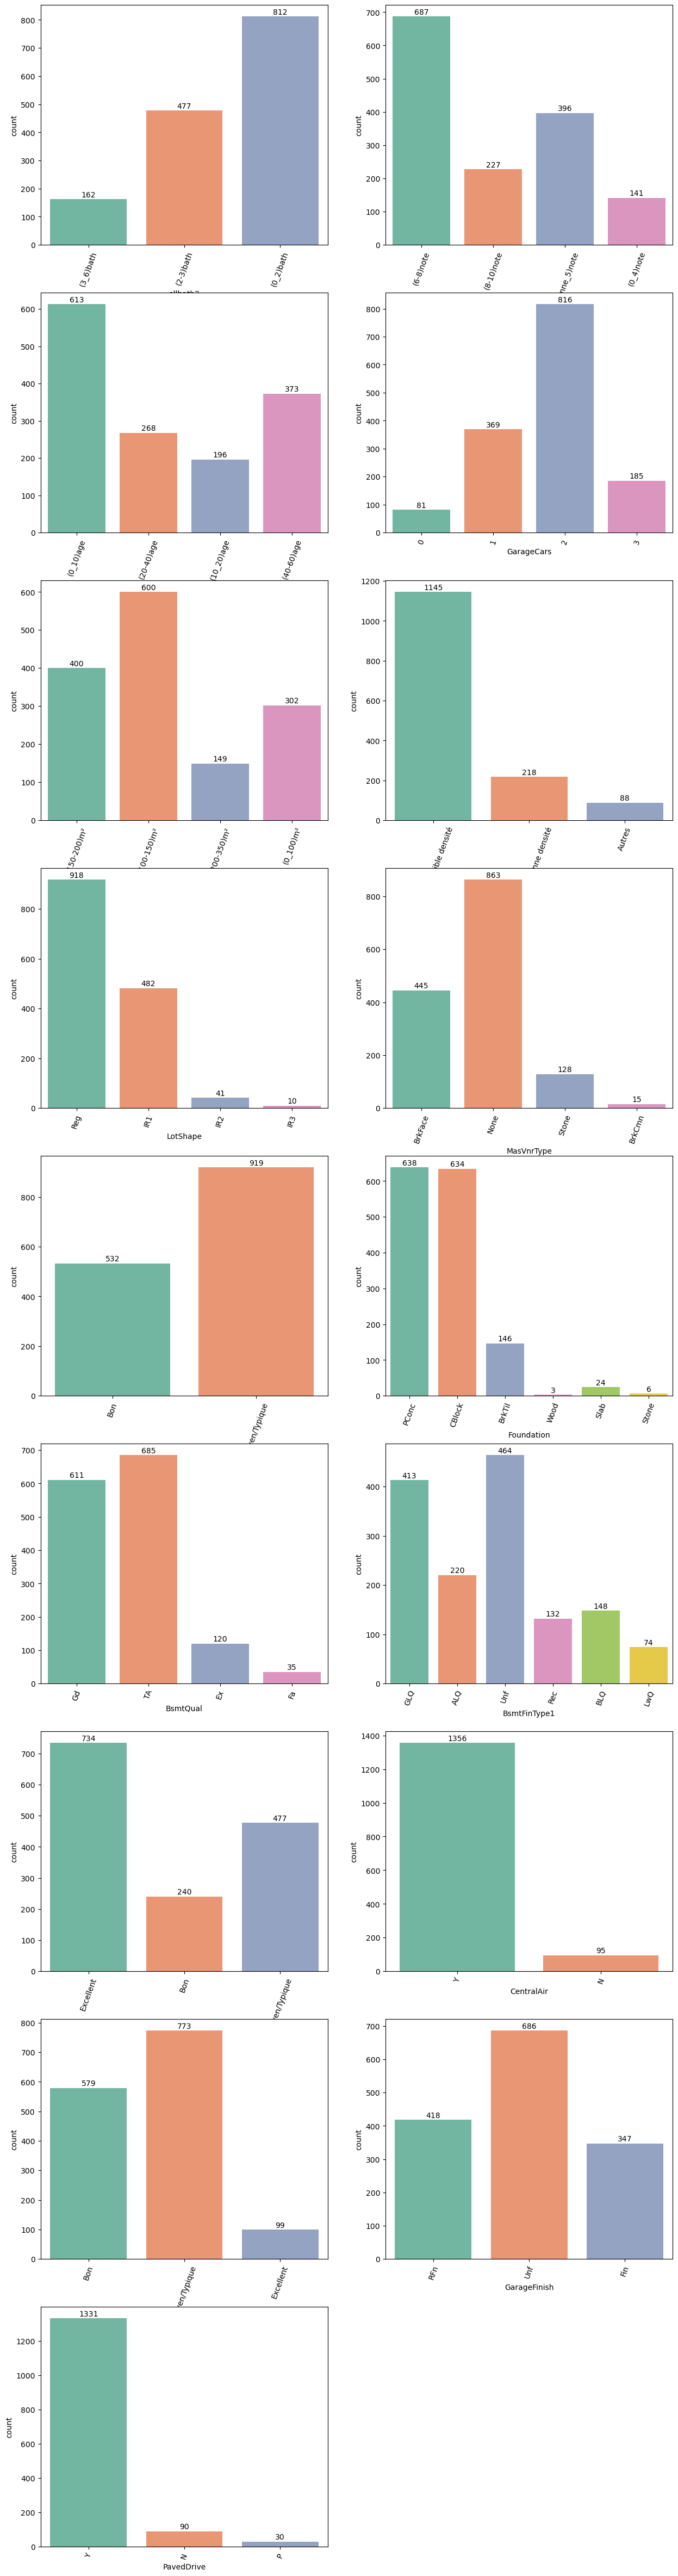

In [31]:
# visualisation des données 
df_hist = train_df[['allbath2','OverallQual2','age2','GarageCars','SurfaceHabitable2','MSZoning', 'LotShape','MasVnrType', 'ExterQual', 'Foundation',
'BsmtQual','BsmtFinType1','HeatingQC','CentralAir', 'KitchenQual', 'GarageFinish','PavedDrive']]
plt.figure(figsize=(15,150))
plotnumber=1
for c in df_hist:
    ax=plt.subplot(22,2,plotnumber)
    b= sns.countplot(x=df_hist[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show()


In [32]:
last_columns= ['Id','allbath2','OverallQual2','age2','GarageCars','SurfaceHabitable2','MSZoning', 'LotShape','MasVnrType', 'ExterQual', 'Foundation',
'BsmtQual','BsmtFinType1','HeatingQC','CentralAir', 'KitchenQual', 'GarageFinish','PavedDrive','SalePrice']
train_df2 = train_df[last_columns]

- MSZoning : La classification générale de zonage
- LotShape : forme générale de la propriété
- MasVnrType : Type de placage de maçonnerie
- ExterQual : Qualité des matériaux extérieurs
- Foundation : Type de fondation
- BsmtQual :   Hauteur du sous-sol
- BsmtFinType1 : Qualité de la surface finie du sous-sol
- HeatingQC : Qualité et état du chauffage
- CentralAir : Climatisation centrale
- KitchenQual: Qualité de cuisine
- GarageFinish : Finition intérieure du garage 
--PavedDrive :  allée pavée
- OverallQual2 : Qualité globale des matériaux et des finitions

# c) corrélation entre toutes les variables x après création des classes 

Après avoir transformer nos variables numériques en qualitatives, nous allons vérifier la corrélation entre ces variables.  

In [33]:
# Boucle pour calculer la statistique de Cramer V pour chaque variable catégorielle
for var in train_df2:
    crosstab = pd.crosstab(train_df['PavedDrive'], train_df[var])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    V = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
    print(f"la corrélation entre la variable et {var} est de : {V:.4f}")

la corrélation entre la variable et Id est de : 1.0000
la corrélation entre la variable et allbath2 est de : 0.1388
la corrélation entre la variable et OverallQual2 est de : 0.1748
la corrélation entre la variable et age2 est de : 0.1416
la corrélation entre la variable et GarageCars est de : 0.2653
la corrélation entre la variable et SurfaceHabitable2 est de : 0.0674
la corrélation entre la variable et MSZoning est de : 0.1785
la corrélation entre la variable et LotShape est de : 0.0886
la corrélation entre la variable et MasVnrType est de : 0.1553
la corrélation entre la variable et ExterQual est de : 0.1974
la corrélation entre la variable et Foundation est de : 0.2427
la corrélation entre la variable et BsmtQual est de : 0.1844
la corrélation entre la variable et BsmtFinType1 est de : 0.1918
la corrélation entre la variable et HeatingQC est de : 0.1250
la corrélation entre la variable et CentralAir est de : 0.3372
la corrélation entre la variable et KitchenQual est de : 0.1288
la c

Après regroupement, nous vérifions la liaison entre nos variables explicatives. 
Nous observons que :  
- le type de fondation (Foundation), la hauteur du sous-sol(BsmtQual) et la qualité globale des matériaux et des finitions (OverallQual2) sont corrélés. Nous allons garder la variable OverallQual2 car elle semble plus pertinente à garder, mais aussi parce que les autres variables ont des modalités très mal reparties. En effet, presque 80% des valeurs se retrouvent dans une seule modalité.  
- la qualité de la cuine (KitchenQual) et qualité des matériaux extérieurs (ExterQual) sont corrélées. 

In [43]:
# la base finale de train
last_columns= ['Id','allbath2','OverallQual2','age2','GarageCars2','SurfaceHabitable2','MSZoning', 'ExterQual',
               'HeatingQC', 'KitchenQual', 'GarageFinish','SalePrice']
train_df_final = train_df[last_columns]

# b) Même traitement dans le test

In [35]:
#visualisation des valeurs manquantes dans df-test
percent_missing_test = test_df.isnull().sum() * 100 / len(test_df)
missing_value_df_test = pd.DataFrame({'Colonne': test_df.columns,
                                 'Pourcentage': percent_missing_test})


missing_value_df_test.sort_values('Pourcentage', inplace=True)
missing_value_df_test

,Colonne,Pourcentage
Id,Id,0.000000
Electrical,Electrical,0.000000
1stFlrSF,1stFlrSF,0.000000
2ndFlrSF,2ndFlrSF,0.000000
LowQualFinSF,LowQualFinSF,0.000000
GrLivArea,GrLivArea,0.000000
FullBath,FullBath,0.000000
HalfBath,HalfBath,0.000000
BedroomAbvGr,BedroomAbvGr,0.000000
KitchenAbvGr,KitchenAbvGr,0.000000


In [36]:
# traitement des valeurs manquantes dans le test
test_df['BsmtQual'].value_counts()
test_df['BsmtQual'].fillna('TA',inplace = True)

test_df['BsmtCond'].value_counts()
test_df['BsmtCond'].fillna('TA',inplace = True)

test_df['BsmtFinType1'].value_counts()
test_df['BsmtFinType1'].fillna('Unf',inplace = True)

test_df['BsmtFinType2'].value_counts()
test_df['BsmtFinType2'].fillna('Unf',inplace = True)

test_df['BsmtExposure'].value_counts()
test_df['BsmtExposure'].fillna('No',inplace = True)

test_df['GarageQual'].value_counts()
test_df['GarageQual'].fillna('TA',inplace = True)


test_df['GarageCond'].value_counts()
test_df['GarageCond'].fillna('TA',inplace = True)


test_df['GarageType'].value_counts()
test_df['GarageType'].fillna('Attchd',inplace = True)


test_df['GarageFinish'].value_counts()
test_df['GarageFinish'].fillna('Unf',inplace = True)

test_df['KitchenQual'].value_counts()
test_df['KitchenQual'].fillna('TA',inplace = True)


In [37]:
# remplacement des valeurs manquantes par la moyenne
test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean(),inplace = True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(),inplace = True)
test_df['GarageArea'].fillna(test_df['GarageArea'].mean(),inplace = True)
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean(),inplace = True)
test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean(),inplace = True)
test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean(),inplace = True)
test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean(),inplace = True)

In [38]:
# creation de nouvelles variables dans le test 
test_df['allbath'] = test_df['BsmtFullBath'] + (test_df['BsmtHalfBath']/2) + test_df['FullBath'] + (test_df['HalfBath']/2)
test_df['age'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [39]:
# traitement des valeurs aberrantes dans le test

test_df.loc[test_df["GrLivArea"] > 3500,'GrLivArea'] = 3500
test_df.loc[test_df["GarageCars"] > 3,'GarageCars'] = 3

# df_num2.loc[df_num2["Fireplaces"]>2,'Fireplaces'] = 2

test_df.loc[test_df["allbath"] > 4,'allbath'] = 4

test_df['SurfaceHabitable'] = test_df['GrLivArea']/(10.764)

In [40]:
# Regroupement des modalités dans le test

pd.options.mode.chained_assignment = None  # pour ne pas afficher les avertissements

test_df.loc[test_df['allbath'].between(0, 2, 'both'), 'allbath2'] = '(0_2)bath' 
test_df.loc[test_df['allbath'].between(2, 3, 'right' ), 'allbath2'] = '(2-3)bath' 
test_df.loc[test_df['allbath'].between(3, 6, 'right' ), 'allbath2'] = '(3_6)bath' 


test_df.loc[test_df['OverallQual'].between(0, 4, 'both'), 'OverallQual2'] = '(0_4)note' 
test_df.loc[test_df['OverallQual'] ==  5, 'OverallQual2'] = '(moyenne_5)note' 
test_df.loc[test_df['OverallQual'].between(5, 7, 'right' ), 'OverallQual2'] = '(6-8)note' 
test_df.loc[test_df['OverallQual'].between(7, 10, 'right' ), 'OverallQual2'] = '(8-10)note' 

test_df.loc[test_df['age'].between(0,10, 'both'), 'age2'] = '(0_10)age' 
test_df.loc[test_df['age'].between(10,20, 'right'), 'age2'] = '(10_20)age' 
test_df.loc[test_df['age'].between(20,40, 'right' ), 'age2'] = '(20-40)age' 
test_df.loc[test_df['age'].between(40,60, 'right' ), 'age2'] = '(40-60)age'
test_df.loc[test_df['age'].between(60,80, 'right' ), 'age2'] = '(60-80)age'

test_df.loc[test_df['SurfaceHabitable'].between(0,100, 'both'), 'SurfaceHabitable2'] = '(0_100)m²' 
test_df.loc[test_df['SurfaceHabitable'].between(100,150, 'right' ), 'SurfaceHabitable2'] = '(100-150)m²' 
test_df.loc[test_df['SurfaceHabitable'].between(150,200, 'right' ), 'SurfaceHabitable2'] = '(150-200)m²'
test_df.loc[test_df['SurfaceHabitable'].between(200,350, 'right' ), 'SurfaceHabitable2'] = '(200-350)m²'

test_df.loc[test_df['GarageCars']==0, 'GarageCars2'] = 'GarageCars0' 
test_df.loc[test_df['GarageCars']==1, 'GarageCars2'] = 'GarageCars1' 
test_df.loc[test_df['GarageCars']==2, 'GarageCars2'] = 'GarageCars2'
test_df.loc[test_df['GarageCars']==3, 'GarageCars2'] = 'GarageCars3'

test_df['ExterQual'] = np.where(test_df['ExterQual'] == 'Ex', 'Bon',
       np.where(test_df['ExterQual'] == 'Gd', 'Bon', 'Moyen/Typique'))

test_df['HeatingQC'] = np.where(test_df['HeatingQC'] == 'Ex', 'Excellent',
       np.where(test_df['HeatingQC'] == 'Gd', 'Bon', 'Moyen/Typique'))

test_df['KitchenQual'] = np.where(test_df['KitchenQual'] == 'Ex', 'Excellent',
       np.where(test_df['KitchenQual'] == 'Gd', 'Bon', 'Moyen/Typique'))

test_df['MSZoning'] = np.where(test_df['MSZoning'] == 'RL', 'Résidentiel à faible densité',
       np.where(test_df['MSZoning'] == 'RM', 'Résidentiel de moyenne densité', 'Autres'))


In [42]:
# la base finale de test
last_columns2= ['Id','allbath2','OverallQual2','age2','GarageCars2','SurfaceHabitable2','MSZoning', 'ExterQual',
               'HeatingQC', 'KitchenQual', 'GarageFinish']
test_df_final = test_df[last_columns2]

# c) Création des dummies pour la modélisation

In [45]:
dum_train = pd.get_dummies(train_df_final, columns=['allbath2','OverallQual2','age2','GarageCars2','SurfaceHabitable2','MSZoning', 'ExterQual',
               'HeatingQC', 'KitchenQual', 'GarageFinish'])

In [46]:
dum_train

,Id,SalePrice,allbath2_(0_2)bath,allbath2_(2-3)bath,allbath2_(3_6)bath,OverallQual2_(0_4)note,OverallQual2_(6-8)note,OverallQual2_(8-10)note,OverallQual2_(moyenne_5)note,age2_(0_10)age,...,ExterQual_Moyen/Typique,HeatingQC_Bon,HeatingQC_Excellent,HeatingQC_Moyen/Typique,KitchenQual_Bon,KitchenQual_Excellent,KitchenQual_Moyen/Typique,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,208500,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,2,181500,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,3,223500,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,4,140000,1,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,1
4,5,250000,0,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
1456,1457,210000,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1457,1458,266500,1,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1458,1459,142125,1,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1


In [47]:
dum_test = pd.get_dummies(test_df_final, columns=['allbath2','OverallQual2','age2','GarageCars2','SurfaceHabitable2','MSZoning', 'ExterQual',
               'HeatingQC', 'KitchenQual', 'GarageFinish'])

In [48]:
pd.options.display.max_rows=1000 # pour pouvoir afficher toutes les lignes 
print(dum_test.columns)

Index(['Id', 'allbath2_(0_2)bath', 'allbath2_(2-3)bath', 'allbath2_(3_6)bath',
       'OverallQual2_(0_4)note', 'OverallQual2_(6-8)note',
       'OverallQual2_(8-10)note', 'OverallQual2_(moyenne_5)note',
       'age2_(0_10)age', 'age2_(10_20)age', 'age2_(20-40)age',
       'age2_(40-60)age', 'GarageCars2_GarageCars0', 'GarageCars2_GarageCars1',
       'GarageCars2_GarageCars2', 'GarageCars2_GarageCars3',
       'SurfaceHabitable2_(0_100)m²', 'SurfaceHabitable2_(100-150)m²',
       'SurfaceHabitable2_(150-200)m²', 'SurfaceHabitable2_(200-350)m²',
       'MSZoning_Autres', 'MSZoning_Résidentiel de moyenne densité',
       'MSZoning_Résidentiel à faible densité', 'ExterQual_Bon',
       'ExterQual_Moyen/Typique', 'HeatingQC_Bon', 'HeatingQC_Excellent',
       'HeatingQC_Moyen/Typique', 'KitchenQual_Bon', 'KitchenQual_Excellent',
       'KitchenQual_Moyen/Typique', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object')


In [49]:
pd.options.display.max_rows=1000 # pour pouvoir afficher toutes les lignes 
print(dum_train.columns)

Index(['Id', 'SalePrice', 'allbath2_(0_2)bath', 'allbath2_(2-3)bath',
       'allbath2_(3_6)bath', 'OverallQual2_(0_4)note',
       'OverallQual2_(6-8)note', 'OverallQual2_(8-10)note',
       'OverallQual2_(moyenne_5)note', 'age2_(0_10)age', 'age2_(10_20)age',
       'age2_(20-40)age', 'age2_(40-60)age', 'GarageCars2_GarageCars0',
       'GarageCars2_GarageCars1', 'GarageCars2_GarageCars2',
       'GarageCars2_GarageCars3', 'SurfaceHabitable2_(0_100)m²',
       'SurfaceHabitable2_(100-150)m²', 'SurfaceHabitable2_(150-200)m²',
       'SurfaceHabitable2_(200-350)m²', 'MSZoning_Autres',
       'MSZoning_Résidentiel de moyenne densité',
       'MSZoning_Résidentiel à faible densité', 'ExterQual_Bon',
       'ExterQual_Moyen/Typique', 'HeatingQC_Bon', 'HeatingQC_Excellent',
       'HeatingQC_Moyen/Typique', 'KitchenQual_Bon', 'KitchenQual_Excellent',
       'KitchenQual_Moyen/Typique', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object')


# IV)  Modélisation 

In [50]:
# Séparer les données en variables X et variable cible y (SalePrice)
y = dum_train['SalePrice']
X = dum_train.drop('SalePrice', axis=1)

#X_test_soumission représente les valeurs sur lesquelles on va se baser pour prédire le prix
X_test_soumission = dum_test

In [51]:

## Split des données du modèle sur les données d'entraînement (split sur 80% pour train et 20% pour test avec un tirage alétoire fixé à 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [52]:
# Répartition des données
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 34)
(291, 34)
(1160,)
(291,)


#Pour mesurer la performance les performances de nos modèles, nous allons nous baser sur ces 3 indicateurs ci-dessous qui nous permettrons de choisir le modèle à soummetre sur Kaggle. Sachant que le score sur Kaggle est donné en fonction de l'indicateur MAE. 
- R² : Mesure de la relation linéaire entre X et Y. Elle est interprétée comme la proportion de la variance de la variable dépendante qui est prévisible à partir de la variable indépendante.


- Le RMSE (Root Mean Squared Error) est la racine carrée de l'erreur quadratique moyenne. Il mesure l'écart moyen entre les valeurs prédites et les valeurs réelles, en prenant en compte les carrés des différences entre ces deux valeurs. Le RMSE est calculé en prenant la moyenne de ces carrés, puis en prenant la racine carrée du résultat pour obtenir une mesure de l'erreur dans la même unité que la variable cible.

La formule pour calculer le RMSE est la suivante :
RMSE = sqrt(1/n * sum((y_pred - y_true)^2))

où y_pred est le vecteur de valeurs prédites, y_true est le vecteur de valeurs réelles, n est la taille des vecteurs et ^2 représente l'opération d'élévation au carré.

- Le MAE (Mean Absolute Error) est une mesure de l'écart moyen entre les valeurs prédites et les valeurs réelles.

La formule pour calculer le MAE est la suivante :
MAE = 1/n * sum(abs(y_pred - y_true))

où y_pred est le vecteur de valeurs prédites, y_true est le vecteur de valeurs réelles et n est la taille des vecteurs.

Le RMSE est plus sensible aux grandes erreurs de prédiction que le MAE. Par conséquent, le RMSE est souvent utilisé comme mesure de performance pour les tâches de régression lorsque les erreurs de prédiction sont importantes. Le MAE est souvent utilisé comme mesure de performance lorsque les erreurs de prédiction sont moins critiques et qu'il est important de mesurer la précision moyenne des prédictions.



# Regression linéaire

La régression linéaire est un modèle qui permet de modéliser la relation linéaire entre les variables indépendantes et la variable dépendante en ajustant une ligne droite à travers les données d'entraînement

In [53]:

# Creation du modèle
lm = LinearRegression()

# utilisation du modèle dans la base train  
lm.fit(X_train, y_train)

# Modèle de prediction sur la base train
y_pred = lm.predict(X_test)

In [54]:

# Evaluation du modèle

print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7873543139898632
MAE: 23410.775261885574
RMSE: 33801.99395736308


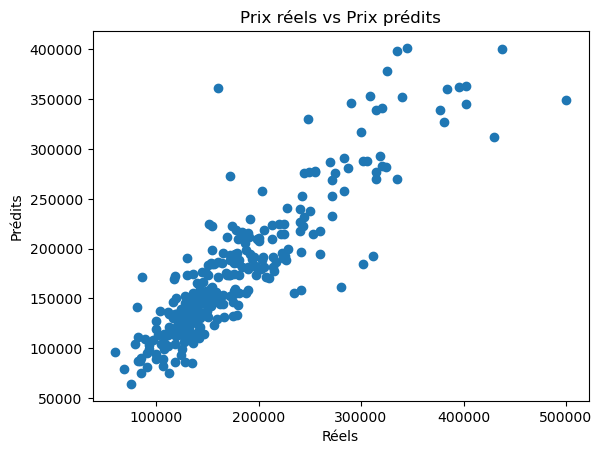

In [55]:
# Repartition entre les données prédites et réelles 
plt.scatter(y_test, y_pred)
plt.xlabel("Réels")
plt.ylabel("Prédits")
plt.title("Prix réels vs Prix prédits")
plt.show()


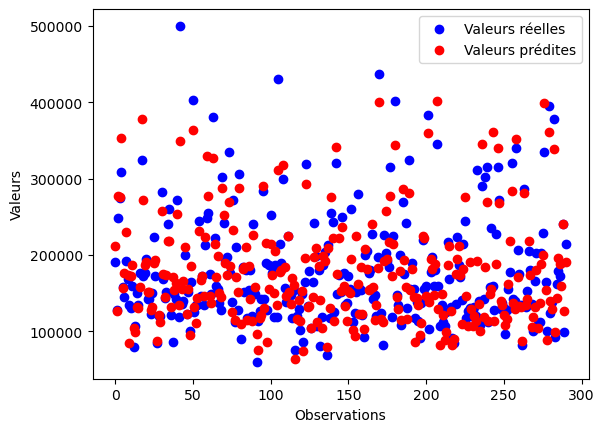

In [56]:
# visualisation des valeurs réelles et prédites
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valeurs réelles')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Valeurs prédites')

# étiquettes d'axe et une légende
plt.xlabel('Observations')
plt.ylabel('Valeurs')
plt.legend()

# Affichage du graphique
plt.show()

In [57]:
#aperçu des features à prédire
X_test_soumission.head()

,Id,allbath2_(0_2)bath,allbath2_(2-3)bath,allbath2_(3_6)bath,OverallQual2_(0_4)note,OverallQual2_(6-8)note,OverallQual2_(8-10)note,OverallQual2_(moyenne_5)note,age2_(0_10)age,age2_(10_20)age,...,ExterQual_Moyen/Typique,HeatingQC_Bon,HeatingQC_Excellent,HeatingQC_Moyen/Typique,KitchenQual_Bon,KitchenQual_Excellent,KitchenQual_Moyen/Typique,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1461,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
1,1462,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,1463,0,1,0,0,0,0,1,0,1,...,1,1,0,0,0,0,1,1,0,0
3,1464,0,1,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,1,0,0
4,1465,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [58]:
#Prévision sur les variabels de X_test_soumission pour tester les résultats sur Kaggle
test_pred_lineaire = lm.predict(X_test_soumission)
Submission = pd.DataFrame(test_pred_lineaire, columns = ['SalePrice'])
Submission['Id'] = dum_test['Id']
Submission_lineaire = Submission[['Id', 'SalePrice']]
Submission_lineaire.shape


(1459, 2)

In [59]:
#extraction des données prédites pour tester sur Kaggle
Submission.to_csv('Submission_lineaire.csv',index=False)

# Random Forest Regressor

Le Random Forest est un modèle d'apprentissage supervisé qui combine plusieurs arbres de décision aléatoires pour créer un modèle plus robuste et généralisable.

In [60]:

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

# Model prediction on train data
y_predrfs = reg.predict(X_test)

In [61]:

rmse = mean_squared_error(y_test, y_predrfs, squared=False)
mae = mean_absolute_error(y_test, y_predrfs)

print('R^2:',metrics.r2_score(y_test, y_predrfs))
print(f"RMSE : {rmse}")
print(f"MAE : {mae}")

R^2: 0.7714480453956479
RMSE : 35043.42142455631
MAE : 23960.296048109965


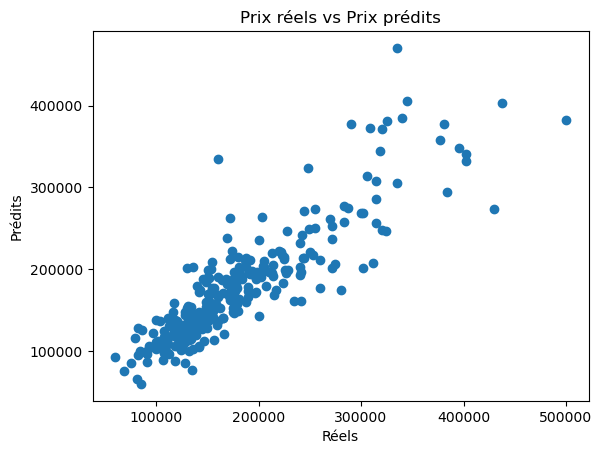

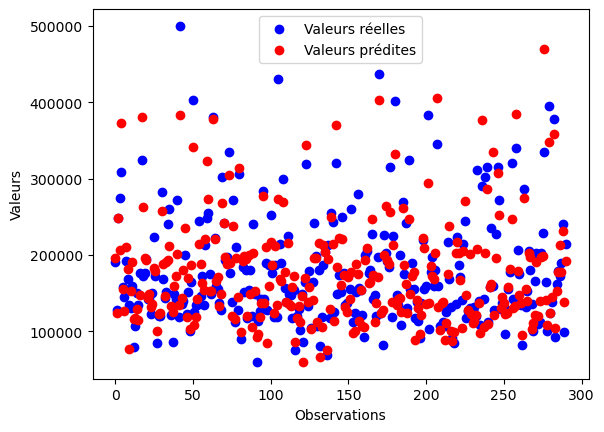

In [62]:
# Repartition entre les données prédites et réelles 
plt.scatter(y_test, y_predrfs)
plt.xlabel("Réels")
plt.ylabel("Prédits")
plt.title("Prix réels vs Prix prédits")
plt.show()

# en fonction des dobservations
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valeurs réelles')
plt.scatter(range(len(y_predrfs)), y_predrfs, color='red', label='Valeurs prédites')

# étiquettes d'axe et une légende
plt.xlabel('Observations')
plt.ylabel('Valeurs')
plt.legend()

# Affichage du graphique
plt.show()


In [63]:
#Prévision sur les variabels de X_test_soumission pour tester les résultats sur Kaggle
test_pred = reg.predict(X_test_soumission)
Submission = pd.DataFrame(test_pred, columns = ['SalePrice'])
Submission['Id'] = dum_test['Id']
Submission_rfs = Submission[['Id', 'SalePrice']]
Submission_rfs.shape
#export
#Submission.to_csv('Submission_rfs.csv',index=False)

(1459, 2)

In [64]:
# Afficher les importances relatives pour chaque variable pour verifier si les modalités qui sont les mieux représentés.
importances = reg.feature_importances_
variables = X_train.columns

for variable, importance in zip(variables, importances):
    print(f"{variable}: {importance}")

#Par exemple
    #on note que le fait d'avoir une note comprise entre 7-10 est plus susceptible d'augmaenter le prix de la maison par rapport aux notes plus faibles
    # OverallQual2_(3-5)note: 0.0006655831460567005
    #OverallQual2_(5-7)note: 0.1084072198218682
    #OverallQual2_(7-10)note: 0.4611829578181941
    

Id: 0.07861988946687438
allbath2_(0_2)bath: 0.034002404643388634
allbath2_(2-3)bath: 0.007035663873917646
allbath2_(3_6)bath: 0.012149593419938319
OverallQual2_(0_4)note: 0.005528337033653692
OverallQual2_(6-8)note: 0.09102008170789316
OverallQual2_(8-10)note: 0.4381351449401441
OverallQual2_(moyenne_5)note: 0.005237263740689297
age2_(0_10)age: 0.006047547960800308
age2_(10_20)age: 0.004717706566820914
age2_(20-40)age: 0.003020650603523741
age2_(40-60)age: 0.004976646713195247
GarageCars2_GarageCars0: 0.004748271939874081
GarageCars2_GarageCars1: 0.0021184854541904663
GarageCars2_GarageCars2: 0.010613128505270844
GarageCars2_GarageCars3: 0.04723604515577936
SurfaceHabitable2_(0_100)m²: 0.010168345464249074
SurfaceHabitable2_(100-150)m²: 0.013946981643304253
SurfaceHabitable2_(150-200)m²: 0.014444894605380773
SurfaceHabitable2_(200-350)m²: 0.03998470561320242
MSZoning_Autres: 0.002613801927162126
MSZoning_Résidentiel de moyenne densité: 0.00852800639635235
MSZoning_Résidentiel à faible 

# Gradient Boosting

Le Gradient Boosting est un modèle d'apprentissage supervisé qui utilise une approche itérative pour construire un modèle en combinant plusieurs modèles de faible complexité en un seul modèle plus complexe et performant.

In [65]:

# Construction du modèle
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=10)

# Entraînement du modèle
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=10)

In [66]:


# Prédiction sur l'ensemble de validation
y_pred_gb = model.predict(X_test)

# Calcul des métriques
print("RMSE :", mean_squared_error(y_test,y_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))

RMSE : 33801.99395736308
MAE : 23410.775261885574
R² : 0.7873543139898632


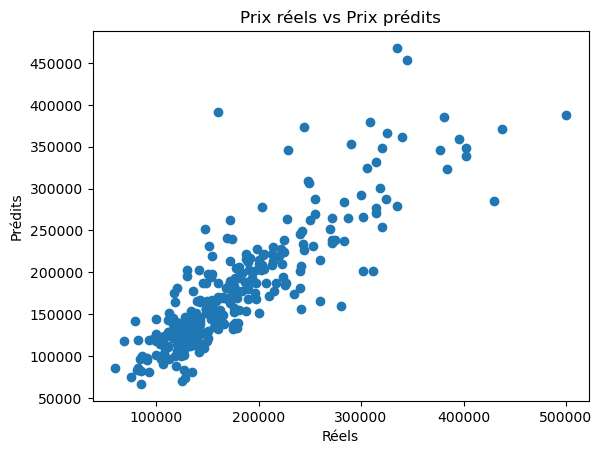

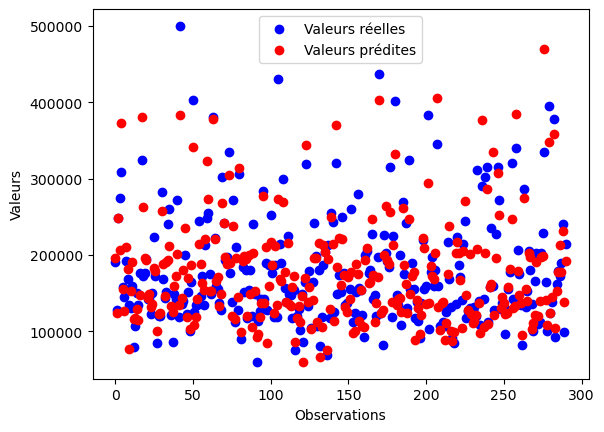

In [67]:
# Repartition entre les données prédites et réelles 
plt.scatter(y_test, y_pred_gb)
plt.xlabel("Réels")
plt.ylabel("Prédits")
plt.title("Prix réels vs Prix prédits")
plt.show()

# en fonction des dobservations
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valeurs réelles')
plt.scatter(range(len(y_pred_gb)), y_predrfs, color='red', label='Valeurs prédites')

# étiquettes d'axe et une légende
plt.xlabel('Observations')
plt.ylabel('Valeurs')
plt.legend()

# Affichage du graphique
plt.show()


In [68]:
#Prévision sur les variabels de X_test_soumission pour tester les résultats sur Kaggle
test_pred = model.predict(X_test_soumission)
Submission = pd.DataFrame(test_pred, columns = ['SalePrice'])
Submission['Id'] = dum_test['Id']
Submission_gb = Submission[['Id', 'SalePrice']]
Submission_gb.shape
#export
Submission.to_csv('Submission_gb.csv',index=False)

# SVM

Le SVM (Support Vector Machine) est un modèle d'apprentissage supervisé qui cherche à trouver la meilleure séparation possible entre deux classes en maximisant la marge entre les données de ces classes.

In [69]:

# Création du modèle SVM
svm_model = SVR(kernel='linear', C=1, gamma='scale')

# Ajustement du modèle aux données d'entraînement
svm_model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [70]:
# Calcul du score de validation croisée
scores = cross_val_score(svm_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
mae_scores = -cross_val_score(svm_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(svm_model, X_train, y_train, cv=10)

# Affichage des résultats de la validation croisée
print('RMSE: {:.2f}'.format(rmse_scores.mean()))
print('MAE: {:.2f}'.format(mae_scores.mean()))
print('R²: {:.2f}'.format(r2_scores.mean()))

RMSE: 76750.64
MAE: 54290.24
R²: -0.03


In [71]:
# Prédiction sur l'ensemble de validation
y_pred_svm = svm_model.predict(X_test)

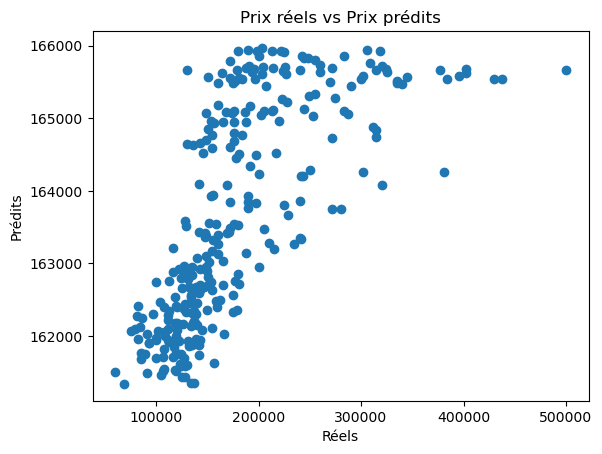

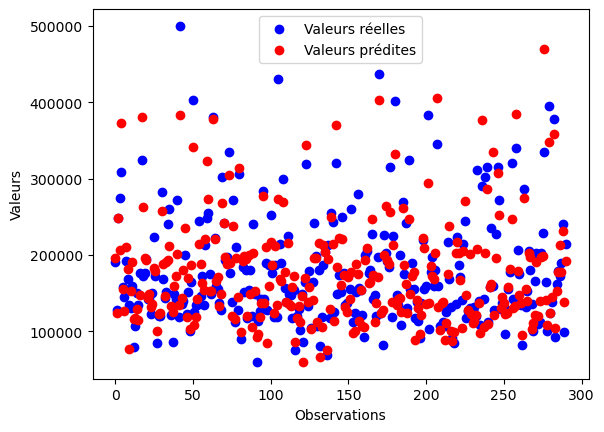

In [72]:
# Repartition entre les données prédites et réelles 
plt.scatter(y_test, y_pred_svm)
plt.xlabel("Réels")
plt.ylabel("Prédits")
plt.title("Prix réels vs Prix prédits")
plt.show()

# en fonction des dobservations
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valeurs réelles')
plt.scatter(range(len(y_pred_gb)), y_predrfs, color='red', label='Valeurs prédites')

# étiquettes d'axe et une légende
plt.xlabel('Observations')
plt.ylabel('Valeurs')
plt.legend()

# Affichage du graphique
plt.show()

In [73]:
#Prévision sur les variabels de X_test_soumission pour tester les résultats sur Kaggle
test_pred = svm_model.predict(X_test_soumission)
Submission = pd.DataFrame(test_pred, columns = ['SalePrice'])
Submission['Id'] = dum_test['Id']
Submission_svm = Submission[['Id', 'SalePrice']]
Submission_svm.shape
#export
Submission.to_csv('Submission_svm.csv',index=False)

# Comparaison des modèles 

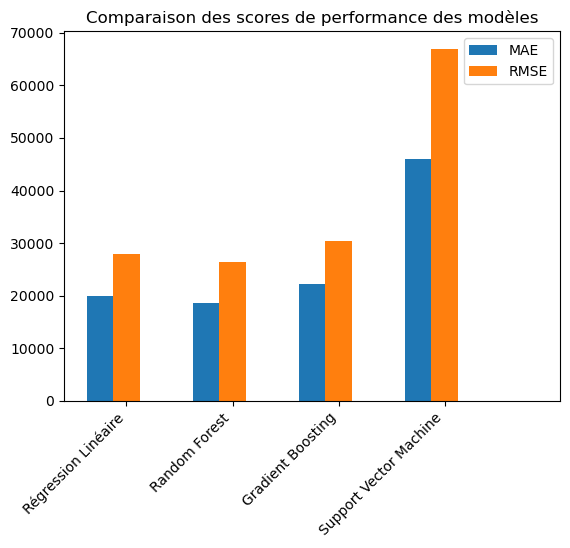

In [74]:


# Scores des modèles pour les métriques MAE, RMSE et R²
mae_scores = [20038.22, 18546.06, 22180.97,45942,32]  # Régression Linéaire, Random Forest, GB et SVM
rmse_scores = [27907.10, 26488.34, 30483.02,66929.29]
#r2_scores = [0.851, 0.834, 0.823]

#  modèles
model_names = ['Régression Linéaire', 'Random Forest', 'Gradient Boosting','Support Vector Machine']

# graphique à barres
bar_width = 0.25
plt.bar(np.arange(len(mae_scores)), mae_scores, width=bar_width, label='MAE')
plt.bar(np.arange(len(rmse_scores))+bar_width, rmse_scores, width=bar_width, label='RMSE')
#plt.bar(np.arange(len(r2_scores))+2*bar_width, r2_scores, width=bar_width, label='R²')

# abscisse
plt.xticks(np.arange(len(model_names))+bar_width, model_names, rotation=45, ha='right')


plt.legend()
plt.title('Comparaison des scores de performance des modèles')

# Afficher le graphique
plt.show()

On note que le Random Forest a des propriétés plus interessantes car le RMSE et le MAE sont plus faibles pour ce modèle.  l'écart moyen entre les valeurs prédites et les valeurs réelles est  doncplus faible pour ce modèle.
Sur Kaggle, le score est calculé en fonction du résultats des erreurs des prévisions. Ainsi plus le taux d'erreur est faible, meilleur est le modèle.
On retrouve donc sur Kaggle :
Régression linéaire : 0,4567 
Random Forest : 0,14359
Gradient Boosting : 0,75529
Support Vector Machine : 0,40682
Celà confirmme donc nos analyses sur le meilleur modèle qui est le Random Forest.

Nous proposerons ensuite une interface utilisateur permettant de prédire le prix de vente d'une maison en fonction de certaines caractéristiques et sur le modèle du Random Forest.
Enfin nous ferons un tableau de bord sur Qlik Sense sur les données prédites.
